<a href="https://colab.research.google.com/github/sofialabrab/ADA-informes/blob/main/ProbMochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE LA MOCHILA**

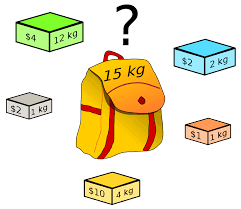

En esta oportunidad analizaremos el problema de la mochila, pero antes de eso debemos conocer una estrategia de resolución previa, la cual será **algoritmo greedy**.

##***Algoritmo Greedy***


> El algoritmo greedy, es conocido por ser voráz al resolver **problemas de optimización**, debido que analiza un subproblema y toda la mejor solución que se da *en el momento*. Es importante recalcar que la solución es **momentanea**, por lo que el algoritmo no evaluará si la solcuión que esta tomando actualmente será la más óptima en un futuro.






Se nos presenta el siguiente problema:



>"Un ladrón quiere robar una tienda que tiene $n$ objetos. Cada objeto tiene un peso $w_i$ y un valor $v_i$. El ladrón tiene una mochila que soporta un peso máximo $W$.  ¿Qué objetos debe robar el ladrón para maximizar el valor total de ellos?"



Para resolver este problema, analizaremos dos algoritmos: Bottom-Up y Algoritmo Greedy.



##**PASOS DEL ALGORITMO BOTTOM-UP**

1. Creamos una matriz:



> **Filas:** Su tamaño será de: la cantidad de objetod "obj" + 1


> **Columnas:** Su tamaño será de: los valores del peso hasta llegar a la capacidad máx "p" + 1

  Por lo que la matriz seria -> $ m = obj+1 x p+1$

  Llenamos esta matriz de 0.

2. Tendremos una subestructura óptima, la cual cuenta con 3 casos, pero antes de nombrarlos es necesario saber que:



    m : matriz
    p : peso actual
    obj : objeto actual
    p[obj] : peso del objeto actual
    v[obj] : valor del objeto actual


Por lo que:



> $m[obj, p]$ =

```
 {

  a. 0, si el obj = 0 || p = 0

  b. m[obj - 1, p], si p[obj] > p

  c. max(m[obj - 1, p], m[obj - p, p - p[obj] + v[obj]), si p[obj] < p

}
```



           Estos casos serán: 
           a -> Cuando la cantidad de objetos es 0 o el peso del objeto es 0, por lo que no se puede agregar.
           b -> El peso del objeto actual superá la capacidad máxima que esta disponible en la mochila, por lo que se toma la solución del objeto anterior.

           c -> Como el peso objeto actual no supera el espacio disponible en la mochila, se elige la solución óptima para este caso, es decir, el máximo entre la solución anterior y la solución del caso anterior más el valor agregado del objeto actual.



3. Contaremos con dos ciclos anidados, uno que recorra las filas y otro para las columnas, ocuparemos la subestructura óptima mencionada en el paso anterior para almacenar el valor correspondiente.





##**PASOS DEL ALGORITMO GREEDY**

1. Crear un arreglo que contenga los índices de los objetos.

2. En un arreglo almacenar el valor de los objetos(en kilos) y ordenar estos de mayor a menor.

3. Recorrer el arreglo de índices, agregando los objetos a la mochila.

Al ir agregando los índices de mayor a menor, sabemos que estamos agregando los objetos de manera óptima.







In [6]:
import numpy as np

